### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### Reading the CSV file

In [ ]:
df = pd.read_csv(r'chatgpt1.csv')

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1.0,0.0,5.0,0.0,1.617156e+18,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0.0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1.0,0.0,5.0,0.0,1.617149e+18,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0.0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0.0,0.0,4.0,0.0,1.617156e+18,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1.0
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0.0,0.0,2.0,0.0,1.617156e+18,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0.0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0.0,0.0,4.0,0.0,1.617156e+18,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0.0


In [ ]:
df.tail()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2844,2023-01-22 16:17:01+00:00,1617194634765008899,It's fun to watch ChatGPT get simple history q...,pardon_mi,https://twitter.com/pardon_mi/status/161719463...,https://twitter.com/pardon_mi,NaN,NaN,3.0,13.0,93.0,2.0,1.617195e+18,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,[],0.0
2845,2023-01-22 16:17:07+00:00,1617194660304125954,@bennibaehr Je nachdem wie häufig ich davon ab...,xSakros,https://twitter.com/xSakros/status/16171946603...,https://twitter.com/xSakros,NaN,NaN,0.0,0.0,0.0,0.0,1.616886e+18,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='bennibaehr', id=116497984, dis...",[],0.0
2846,2023-01-22 16:17:07+00:00,1617194658836393985,ChatGPTの有料プランを検討しようとアクセスしたら，ChatGPT is at capa...,igakunomichi,https://twitter.com/igakunomichi/status/161719...,https://twitter.com/igakunomichi,NaN,NaN,0.0,0.0,0.0,0.0,1.617195e+18,ja,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,[],0.0
2847,2023-01-22 16:17:15+00:00,1617194694542528513,@y2m4k7 CHATGPTっていうツール 文章系ならなんでもプログラミングもHTMLもス...,sakuraba_yuri,https://twitter.com/sakuraba_yuri/status/16171...,https://twitter.com/sakuraba_yuri,NaN,NaN,1.0,0.0,0.0,0.0,1.617132e+18,ja,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='y2m4k7', id=2583096188, displa...",[],0.0
2848,2023-01-22 16:17:21+00:00,1617194717816492037,OpenAI está trabalhando em um ritmo mais lento...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User',
       'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media',
       'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts'],
      dtype='object')

In [ ]:
df.shape

(2849, 20)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Datetime             0
Tweet Id             0
Text                 0
Username             1
Permalink            1
User                 1
Outlinks          1834
CountLinks        1834
ReplyCount           1
RetweetCount         1
LikeCount            1
QuoteCount           1
ConversationId       1
Language             1
Source               1
Media             2277
QuotedTweet       2647
MentionedUsers    1878
hashtag              1
hastag_counts        1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849 entries, 0 to 2848
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        2849 non-null   object 
 1   Tweet Id        2849 non-null   int64  
 2   Text            2849 non-null   object 
 3   Username        2848 non-null   object 
 4   Permalink       2848 non-null   object 
 5   User            2848 non-null   object 
 6   Outlinks        1015 non-null   object 
 7   CountLinks      1015 non-null   object 
 8   ReplyCount      2848 non-null   float64
 9   RetweetCount    2848 non-null   float64
 10  LikeCount       2848 non-null   float64
 11  QuoteCount      2848 non-null   float64
 12  ConversationId  2848 non-null   float64
 13  Language        2848 non-null   object 
 14  Source          2848 non-null   object 
 15  Media           572 non-null    object 
 16  QuotedTweet     202 non-null    object 
 17  MentionedUsers  971 non-null    o

In [ ]:
df.describe()

,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts
count,2.849000e+03,2848.000000,2848.000000,2848.000000,2848.000000,2.848000e+03,2848.000000
mean,1.617176e+18,2.600772,3.955056,33.018258,0.853581,1.616440e+18,0.724368
std,1.100449e+13,64.439850,130.116343,1073.430748,36.557426,1.913481e+16,1.755180
min,1.617156e+18,0.000000,0.000000,0.000000,0.000000,7.115537e+17,0.000000
25%,1.617166e+18,0.000000,0.000000,0.000000,0.000000,1.617159e+18,0.000000
50%,1.617175e+18,0.000000,0.000000,0.000000,0.000000,1.617170e+18,0.000000
75%,1.617185e+18,1.000000,0.000000,2.000000,0.000000,1.617182e+18,1.000000
max,1.617195e+18,3098.000000,6815.000000,56073.000000,1947.000000,1.617195e+18,23.000000


In [ ]:
df.nunique()

Datetime          2441
Tweet Id          2849
Text              2793
Username          2556
Permalink         2848
User              2556
Outlinks           858
CountLinks        1007
ReplyCount          35
RetweetCount        43
LikeCount           99
QuoteCount          15
ConversationId    2469
Language            44
Source             128
Media              568
QuotedTweet        159
MentionedUsers     725
hashtag            494
hastag_counts       18
dtype: int64

#### Checking the most frequent value

In [ ]:
def max_frequent_values(data):
    total = data.count()
    total_count = pd.DataFrame(total)
    total_count.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    total_count['Most frequent item'] = items
    total_count['Frequency'] = vals
    total_count['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(total_count))

In [ ]:
max_frequent_values(df)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
Total,2849,2849,2849,2848,2848,2848,1015,1015,2848,2848,2848,2848,2848,2848,2848,572,202,971,2848,2848
Most frequent item,2023-01-22 14:00:03+00:00,1617156270871699456,@chatgpt_issac AI,LluisMontoliu,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/LluisMontoliu,['https://www.ft.com/content/7229ba86-142a-49f...,['https://t.co/fB4gOHiHgs'],0.0,0.0,0.0,0.0,1617156832556126208.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/nabeelqu/status/1616845386...,"[User(username='chatgpt_issac', id=13670024231...",[],0.0
Frequency,4,1,49,8,1,8,22,3,2011,2408,1464,2707,56,1767,929,3,13,55,2076,2076
Percent from total,0.14,0.035,1.72,0.281,0.035,0.281,2.167,0.296,70.611,84.551,51.404,95.049,1.966,62.044,32.619,0.524,6.436,5.664,72.893,72.893


In [ ]:
df['Username'].unique()

array(['mochico0123', 'Caput_LupinumSG', 'ciffi', ..., 'igakunomichi',
       'sakuraba_yuri', nan], dtype=object)

In [ ]:
df['Username'].value_counts()

LluisMontoliu     8
zaganos_pacha     8
k_looked          7
Chad_GPT_DAO      6
N3tyan_           6
                 ..
tom2rd            1
CrazyDutchGuy1    1
convl0            1
Keyurshah3535     1
sakuraba_yuri     1
Name: Username, Length: 2556, dtype: int64

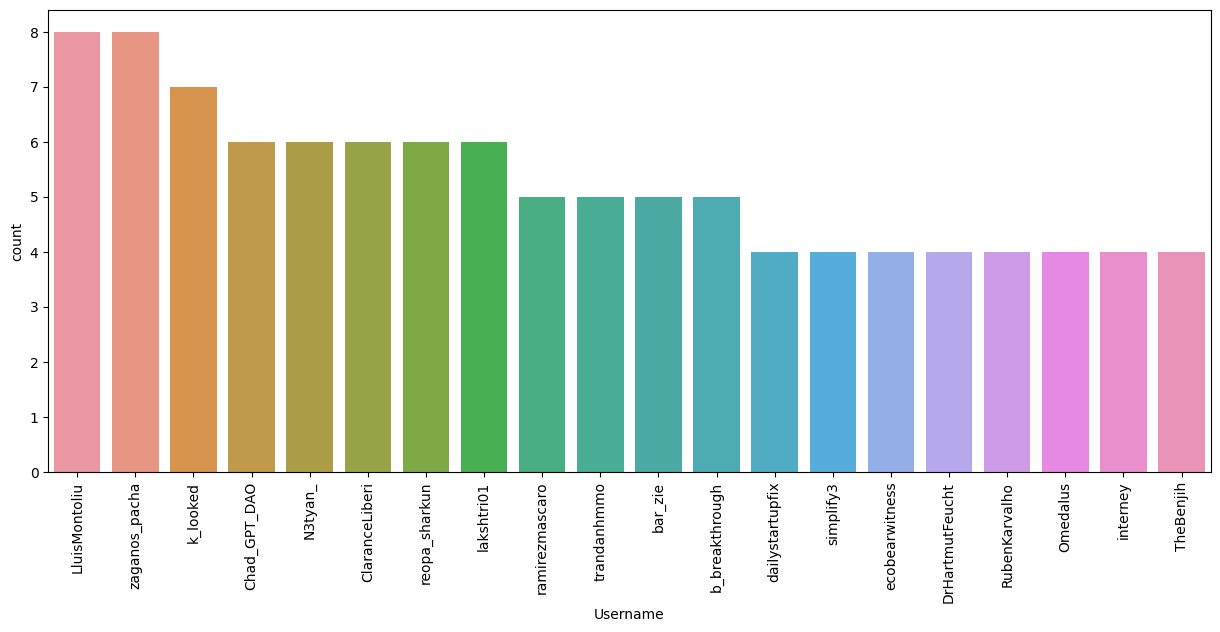

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Username', order=df["Username"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['User'].unique()

array(['https://twitter.com/mochico0123',
       'https://twitter.com/Caput_LupinumSG', 'https://twitter.com/ciffi',
       ..., 'https://twitter.com/igakunomichi',
       'https://twitter.com/sakuraba_yuri', nan], dtype=object)

In [ ]:
df['User'].value_counts()

https://twitter.com/LluisMontoliu     8
https://twitter.com/zaganos_pacha     8
https://twitter.com/k_looked          7
https://twitter.com/Chad_GPT_DAO      6
https://twitter.com/N3tyan_           6
                                     ..
https://twitter.com/tom2rd            1
https://twitter.com/CrazyDutchGuy1    1
https://twitter.com/convl0            1
https://twitter.com/Keyurshah3535     1
https://twitter.com/sakuraba_yuri     1
Name: User, Length: 2556, dtype: int64

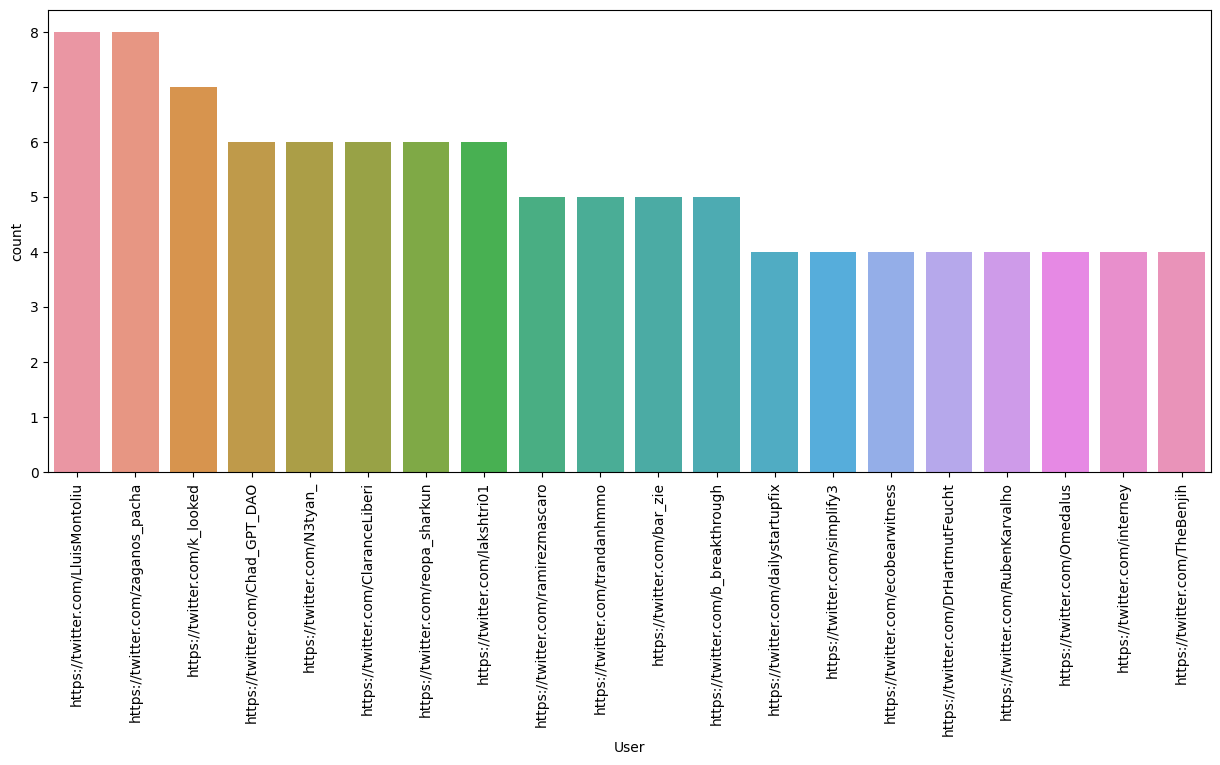

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='User', order=df["User"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['ReplyCount'].unique()

array([1.000e+00, 0.000e+00, 2.300e+01, 4.000e+00, 3.700e+01, 2.000e+00,
       3.000e+00, 2.090e+02, 1.490e+02, 1.260e+02, 1.700e+01, 2.200e+01,
       5.000e+00, 5.400e+01, 3.400e+01, 2.100e+01, 1.300e+01, 3.098e+03,
       6.900e+01, 1.421e+03, 1.000e+01, 8.000e+00, 6.000e+00, 9.000e+00,
       7.000e+00, 4.300e+01, 1.500e+01, 1.100e+01, 1.200e+01, 1.110e+02,
       2.900e+01, 1.640e+02, 2.860e+02, 2.800e+01, 2.000e+01,       nan])

In [ ]:
df['ReplyCount'].value_counts()

0.0       2011
1.0        598
2.0        107
3.0         44
5.0         14
4.0         13
7.0         11
8.0          6
9.0          5
10.0         5
6.0          5
17.0         2
11.0         2
15.0         2
13.0         2
23.0         2
29.0         1
12.0         1
164.0        1
43.0         1
286.0        1
28.0         1
111.0        1
3098.0       1
1421.0       1
69.0         1
21.0         1
34.0         1
54.0         1
22.0         1
126.0        1
149.0        1
209.0        1
37.0         1
20.0         1
Name: ReplyCount, dtype: int64

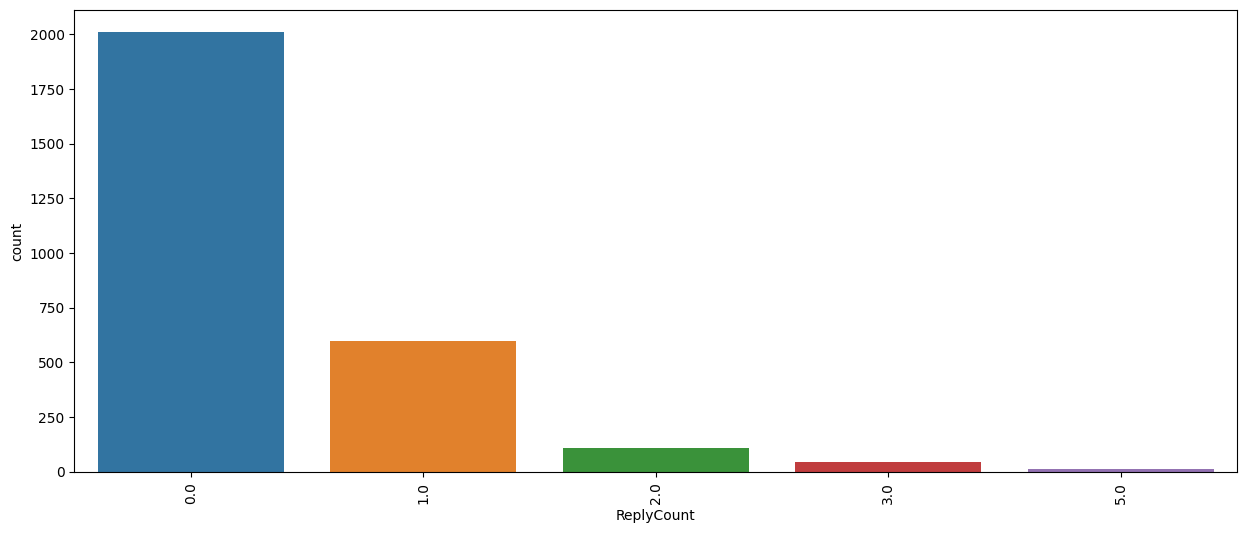

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='ReplyCount', order=df["ReplyCount"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['RetweetCount'].unique()

array([0.000e+00, 1.000e+00, 5.000e+00, 6.000e+00, 5.420e+02, 4.000e+01,
       4.900e+01, 1.800e+01, 3.000e+00, 2.000e+00, 1.600e+01, 4.000e+00,
       1.120e+02, 3.900e+01, 3.600e+01, 1.094e+03, 1.200e+01, 6.815e+03,
       1.000e+01, 2.000e+01, 7.000e+00, 5.800e+01, 2.300e+01, 1.100e+01,
       1.500e+01, 4.500e+01, 3.700e+01, 8.000e+00, 3.100e+01, 1.900e+01,
       1.600e+02, 2.700e+01, 9.000e+00, 3.800e+01, 3.400e+01, 1.400e+01,
       1.250e+02, 1.700e+01, 7.400e+01, 4.610e+02, 6.800e+01, 2.600e+01,
       1.300e+01,       nan])

In [ ]:
df['RetweetCount'].value_counts()

0.0       2408
1.0        234
2.0         70
3.0         28
4.0         18
5.0         11
6.0          9
7.0          7
12.0         6
10.0         6
8.0          5
15.0         3
19.0         3
18.0         3
49.0         2
27.0         2
31.0         2
26.0         2
16.0         2
20.0         2
34.0         2
11.0         2
38.0         1
9.0          1
74.0         1
68.0         1
17.0         1
14.0         1
461.0        1
125.0        1
58.0         1
160.0        1
37.0         1
45.0         1
23.0         1
6815.0       1
1094.0       1
36.0         1
39.0         1
112.0        1
40.0         1
542.0        1
13.0         1
Name: RetweetCount, dtype: int64

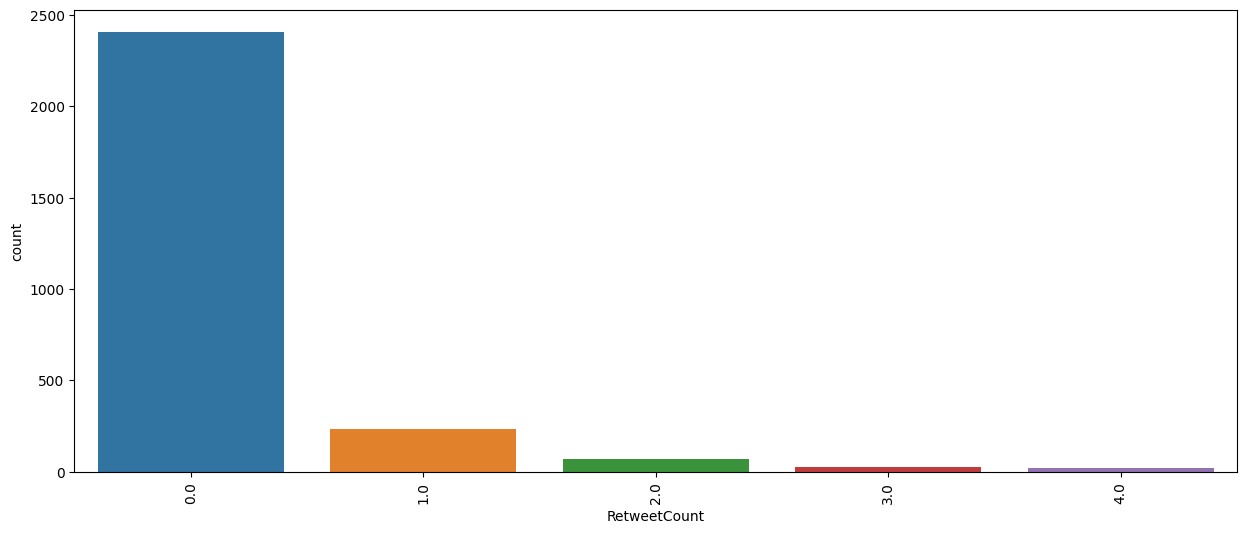

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='RetweetCount', order=df["RetweetCount"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['LikeCount'].unique()

array([5.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
       3.0000e+00, 6.6000e+01, 2.0000e+01, 9.1250e+03, 7.0000e+00,
       3.4800e+02, 6.0700e+02, 1.1000e+01, 9.0000e+00, 4.0400e+02,
       8.0000e+00, 6.0000e+00, 6.8000e+01, 3.2900e+02, 1.0000e+01,
       1.7000e+01, 1.5000e+01, 1.9050e+03, 2.1100e+02, 1.6000e+01,
       2.2000e+01, 1.4000e+01, 3.8100e+02, 1.3000e+01, 5.6820e+03,
       4.2000e+01, 1.9000e+02, 5.7000e+01, 5.6073e+04, 2.6000e+01,
       3.8000e+01, 3.0000e+01, 9.7000e+01, 2.4000e+01, 1.9000e+01,
       1.2000e+01, 5.0000e+01, 1.8000e+01, 2.9000e+01, 5.1000e+01,
       3.3000e+01, 4.1000e+01, 5.5000e+01, 4.4000e+01, 6.6300e+02,
       7.5000e+01, 5.4000e+01, 3.9000e+01, 2.1000e+01, 3.7000e+01,
       2.5200e+02, 4.0000e+01, 4.7000e+01, 3.9000e+02, 8.7000e+01,
       1.7700e+02, 2.3000e+01, 8.4000e+01, 2.8000e+01, 3.1000e+01,
       1.3100e+02, 2.5100e+02, 8.6000e+01, 1.0550e+03, 1.7100e+02,
       6.5000e+01, 1.4400e+02, 5.8000e+01, 1.1100e+02, 7.1000e

In [ ]:
df['LikeCount'].value_counts()

0.0      1464
1.0       537
2.0       259
3.0       132
4.0        80
         ... 
31.0        1
131.0       1
251.0       1
86.0        1
93.0        1
Name: LikeCount, Length: 99, dtype: int64

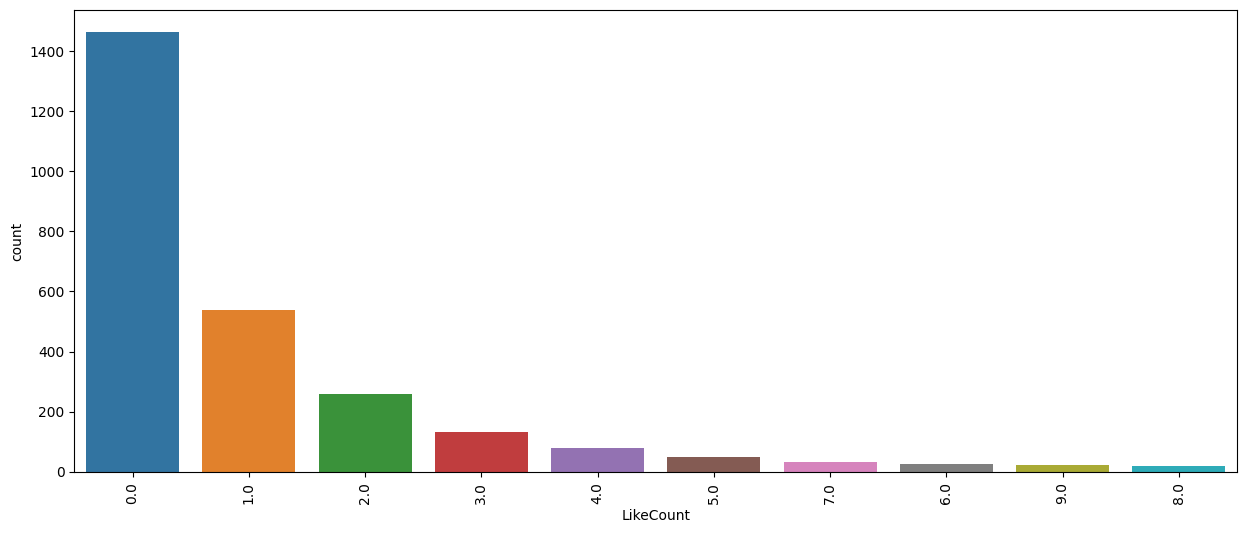

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='LikeCount', order=df["LikeCount"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['QuoteCount'].unique()

array([0.000e+00, 1.000e+00, 2.000e+00, 1.500e+01, 6.000e+00, 8.000e+00,
       3.000e+00, 1.400e+01, 4.500e+01, 1.947e+03, 9.000e+00, 4.000e+00,
       5.000e+00, 2.300e+01, 1.100e+02,       nan])

In [ ]:
df['QuoteCount'].value_counts()

0.0       2707
1.0         87
2.0         17
3.0          8
4.0          7
5.0          6
6.0          4
8.0          4
9.0          2
15.0         1
14.0         1
45.0         1
1947.0       1
23.0         1
110.0        1
Name: QuoteCount, dtype: int64

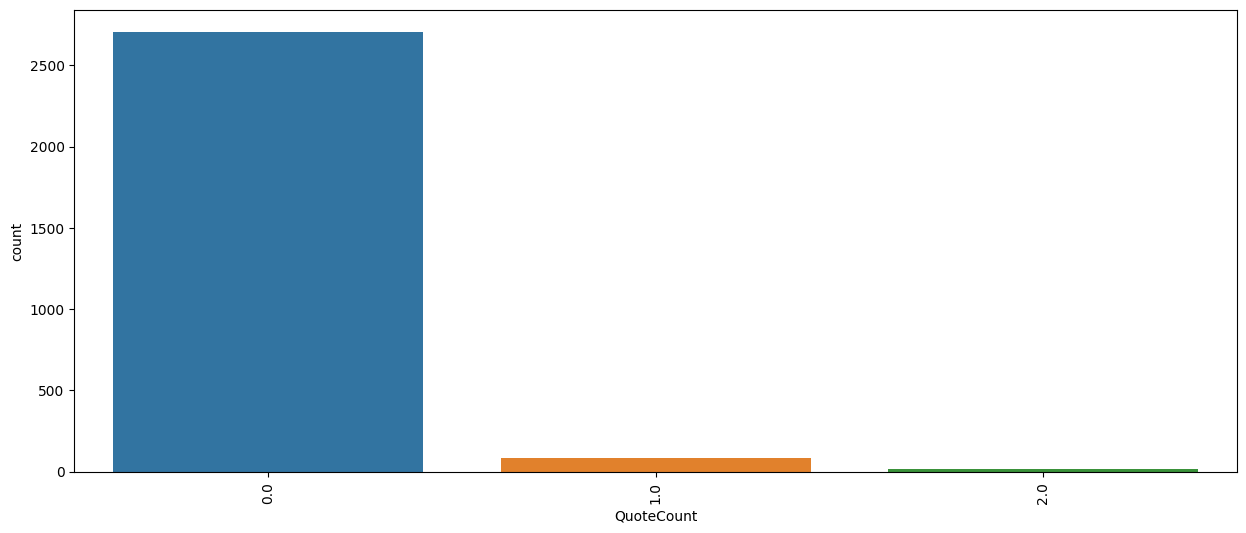

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='QuoteCount', order=df["QuoteCount"].value_counts().index[:3])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Language'].unique()

array(['ja', 'en', 'de', 'tr', 'pl', 'fr', 'es', 'pt', 'lo', 'no', 'ca',
       'zh', 'qme', 'th', 'ne', 'ko', 'und', 'nl', 'fa', 'it', 'da', 'fi',
       'eu', 'hi', 'ar', 'sv', 'in', 'ru', 'qht', 'tl', 'hu', 'cs', 'uk',
       'iw', 'et', 'cy', 'bg', 'ht', 'el', 'vi', 'sl', 'kn', 'ro', 'lt',
       nan], dtype=object)

In [ ]:
df['Language'].value_counts()

en     1767
ja      270
es      205
fr      172
pt       69
und      66
de       56
it       34
tr       29
qme      21
ar       15
in       14
nl       13
zh       10
iw       10
ca        9
hi        9
pl        9
fa        7
ru        6
th        6
fi        5
ko        5
da        5
sv        4
no        4
qht       4
hu        3
vi        3
ht        2
tl        2
cy        2
sl        1
kn        1
ro        1
el        1
eu        1
bg        1
et        1
uk        1
cs        1
ne        1
lo        1
lt        1
Name: Language, dtype: int64

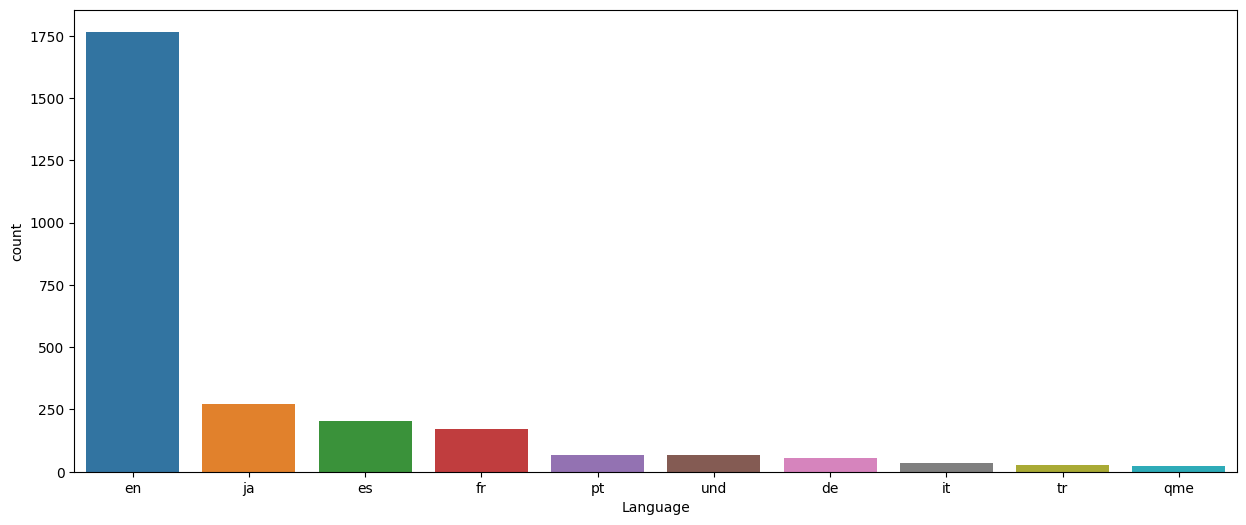

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:10])
plt.show()

In [ ]:
df['Source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
       '<a href="https://nowtice.net/" rel="nofollow">nowtice_news</a>',
       '<a href="https://smarterqueue.com" rel="nofollow">SmarterQueue</a>',
       '<a href="https://github.com/M157q/py-feedr" rel="nofollow">py-feedr-M157q</a>',
       '<a href="http://www.linkedin.com/" rel="nofollow">LinkedIn</a>',
       '<a href="https://soccerstream.org/" rel="nofollow">testttewet</a>',
       '<a href="http://publicize.wp.com/" rel="nofollow">Jetpack.com</a>',
       '<a href="https://contentstudio.io" rel="nofollow">ContentStudio.io</a>',


In [ ]:
df['Source'].value_counts()

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 929
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      758
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    614
<a href="https://ifttt.com" rel="nofollow">IFTTT</a>                                     71
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        62
                                                                                       ... 
<a href="http://akibakokoubou.jp/mcm" rel="nofollow">Mind Change Marker</a>               1
<a href="https://tweetoshi.com" rel="nofollow">Tweetoshi</a>                              1
<a href="https://drawgpt.ai/" rel="nofollow">DrawGPT</a>                                  1
<a href="http://instagram.com" rel="nofollow">Instagram</a>                               1
<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>    

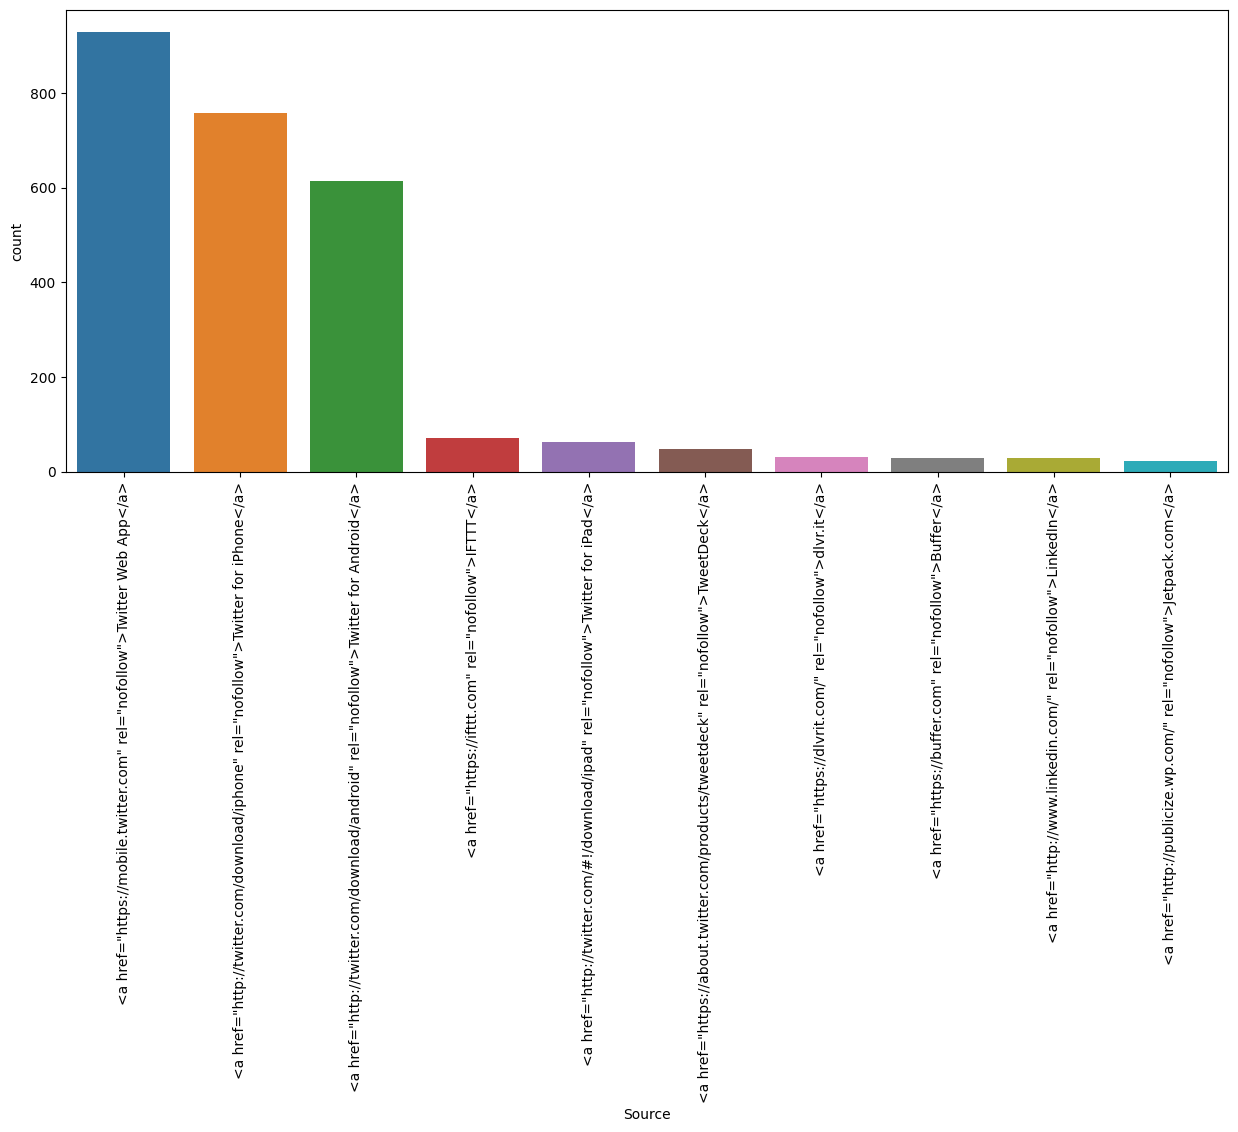

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Source', order=df["Source"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['hastag_counts'].unique()

array([ 0.,  1.,  2.,  4., 11.,  5.,  3., 10., 15.,  8., 12.,  9.,  6.,
        7., 13., 14., 16., 23., nan])

In [ ]:
df['hastag_counts'].value_counts()

0.0     2076
1.0      317
2.0      167
3.0      115
4.0       69
5.0       36
6.0       19
7.0       14
11.0       6
10.0       6
13.0       5
8.0        5
9.0        5
12.0       2
15.0       2
16.0       2
14.0       1
23.0       1
Name: hastag_counts, dtype: int64

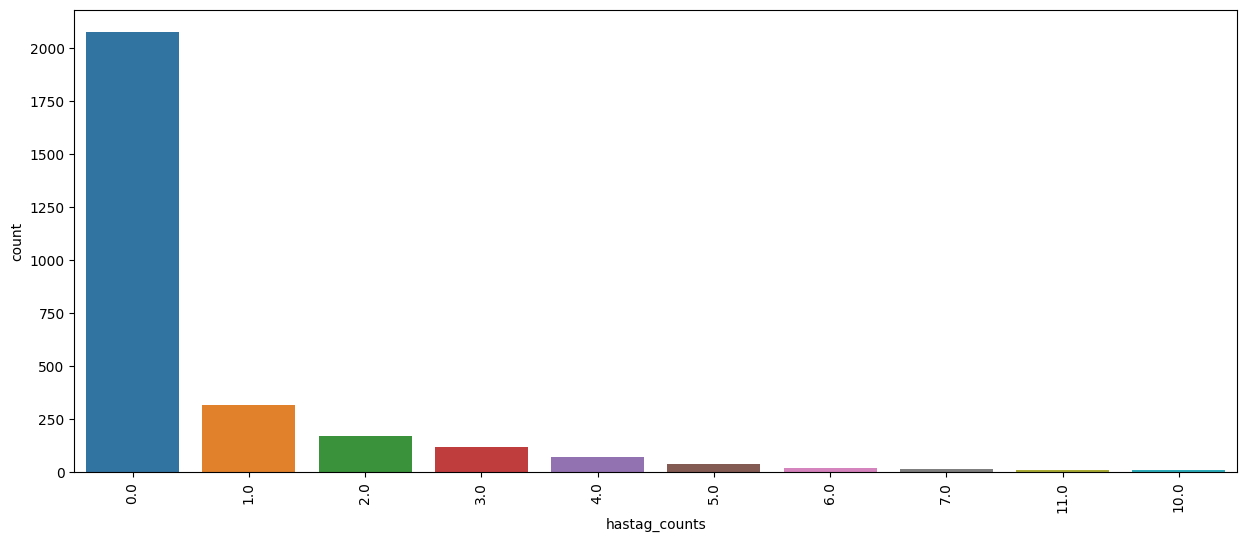

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hastag_counts', order=df["hastag_counts"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['dayofyear'] = df['Datetime'].dt.dayofyear
df['date_only'] = df['Datetime'].dt.date

In [ ]:
tweets_agg_df = df.groupby(["date_only"])["Text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [ ]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    sns.set(style="whitegrid")
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 20}
    sns.set_context("paper", rc = paper_rc)
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

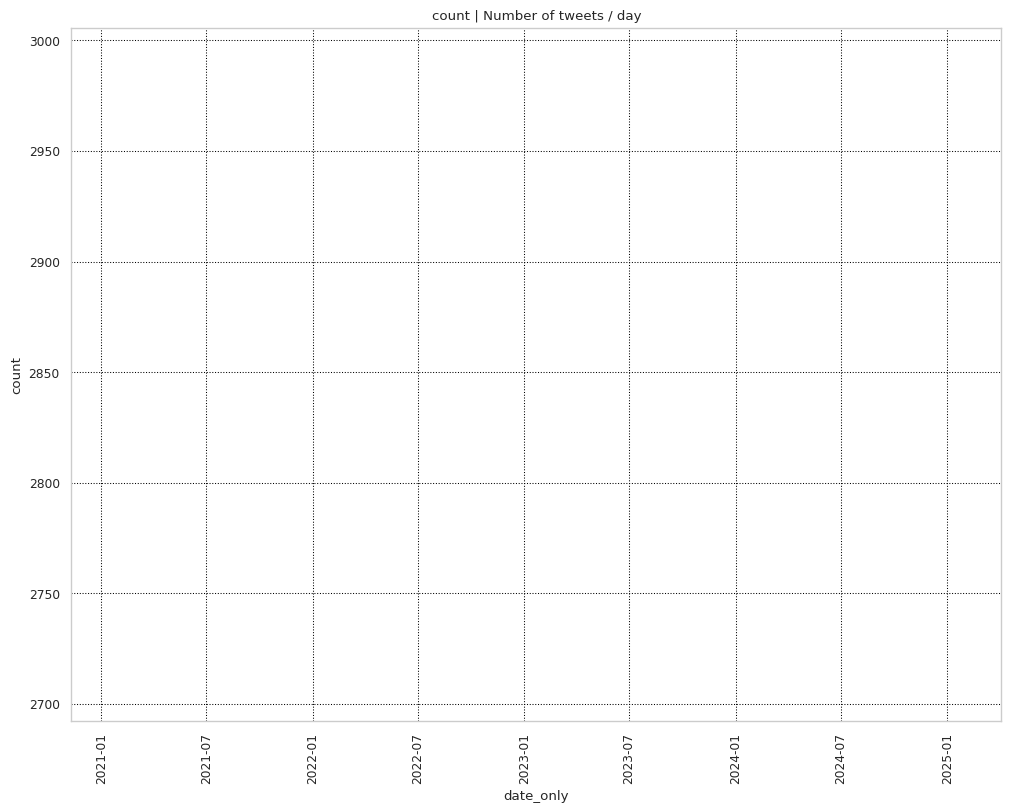

In [ ]:
plot_time_variation(tweets_agg_df, x='date_only', title="Number of tweets / day",size=3)

In [ ]:
df['dayofweek'].unique()

array([6])

In [ ]:
df['dayofweek'].value_counts()

6    2849
Name: dayofweek, dtype: int64

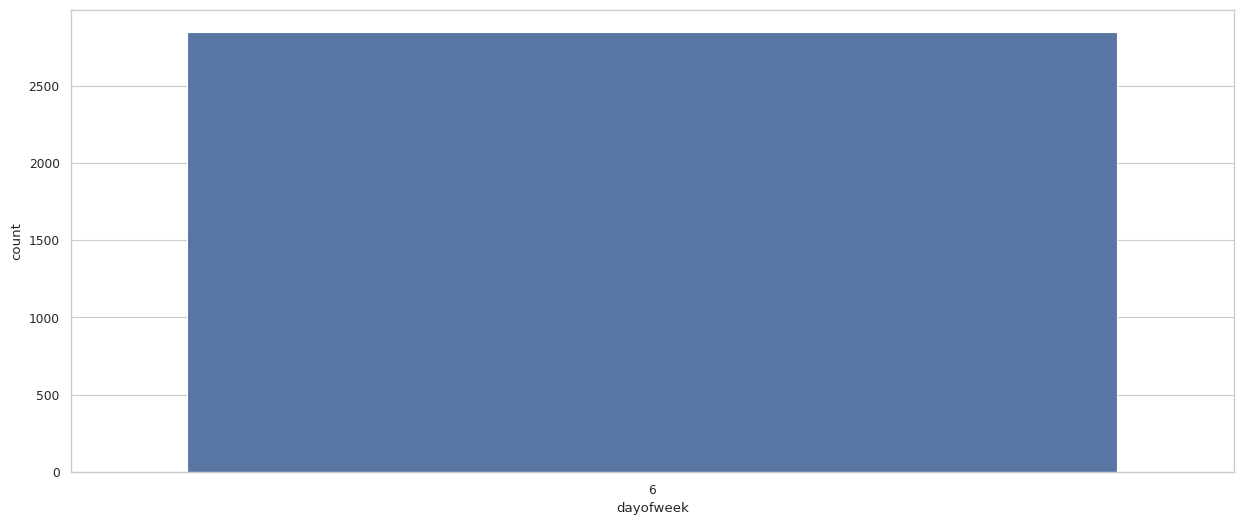

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='dayofweek')
plt.show()

In [ ]:
df['dayofyear'].unique()

array([22])

In [ ]:
df['dayofyear'].value_counts()

22    2849
Name: dayofyear, dtype: int64

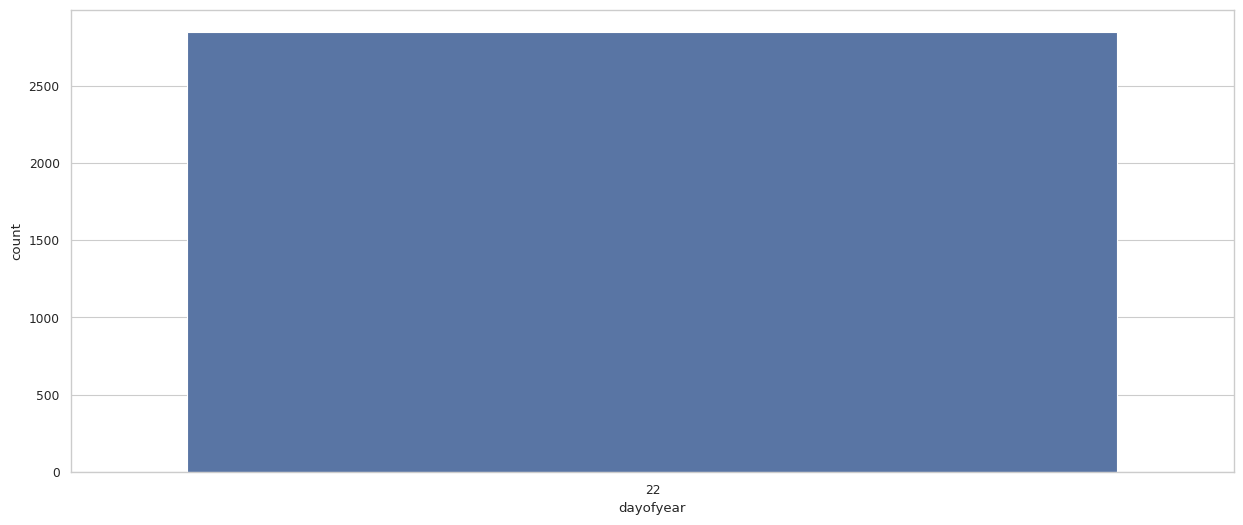

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='dayofyear')
plt.show()


In [ ]:
df['date_only'].unique()

array([datetime.date(2023, 1, 22)], dtype=object)

In [ ]:
df['date_only'].value_counts()

2023-01-22    2849
Name: date_only, dtype: int64

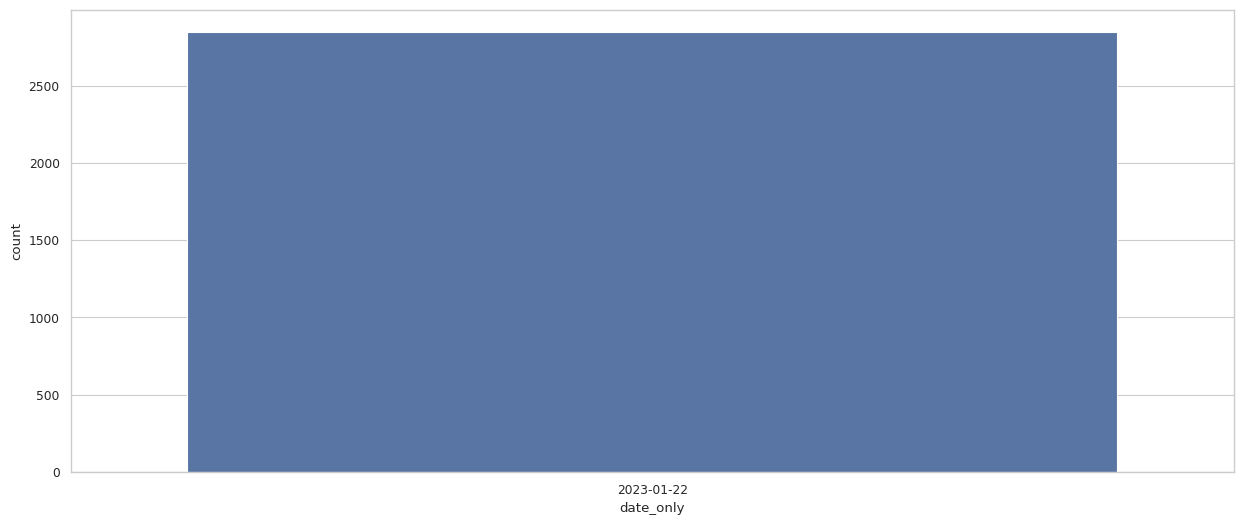

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='date_only')
plt.show()

In [ ]:
df['hour'].unique()

array([13, 14, 15, 16])

In [ ]:
df['hour'].value_counts()

14    1168
15    1100
16     337
13     244
Name: hour, dtype: int64

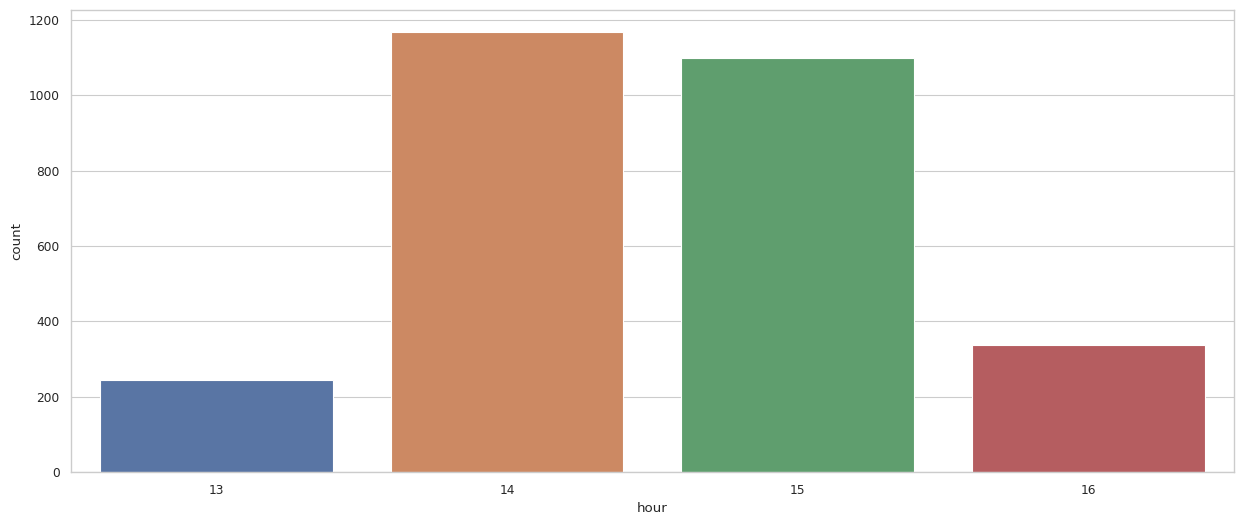

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hour')
plt.show()

In [ ]:
df['minute'].unique()

array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43])

In [ ]:
df['minute'].value_counts()

0     109
48     75
15     71
50     69
1      65
5      62
58     61
12     61
45     60
52     59
11     57
54     57
10     56
14     55
56     54
3      53
7      52
30     51
2      51
49     51
51     51
6      51
53     50
16     50
59     50
34     49
29     49
46     47
9      46
55     46
42     45
57     45
20     44
8      44
17     44
13     44
22     43
41     43
40     43
28     43
4      43
35     43
47     41
18     40
21     39
38     38
23     37
24     37
44     35
25     35
43     35
32     34
39     34
33     31
27     31
31     30
36     28
26     28
37     27
19     27
Name: minute, dtype: int64

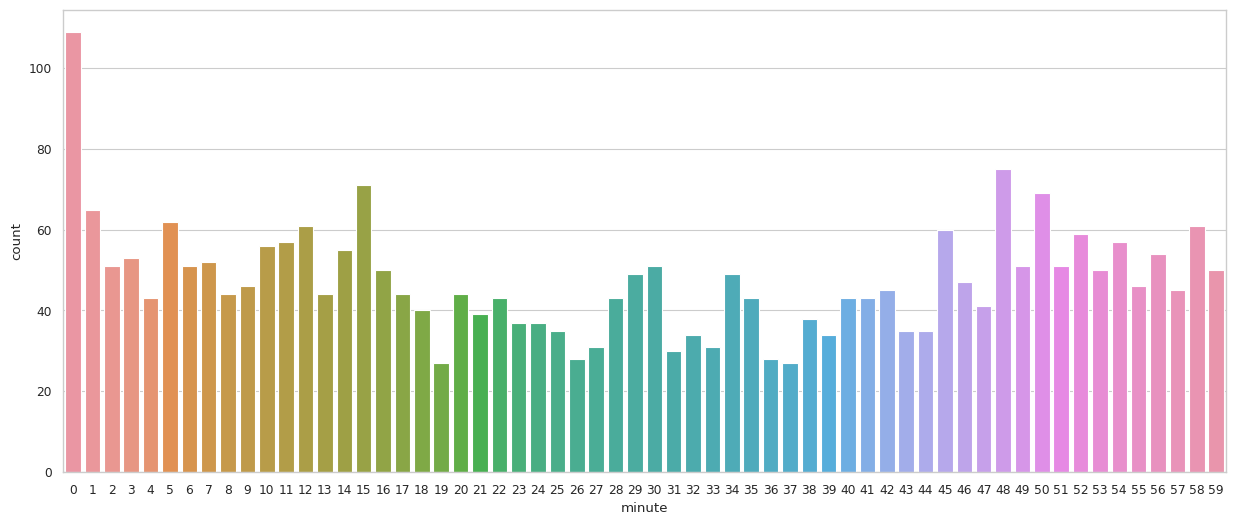

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='minute')
plt.show()

### Analysing the tweets

In [ ]:
result = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if result.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif result.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"

In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

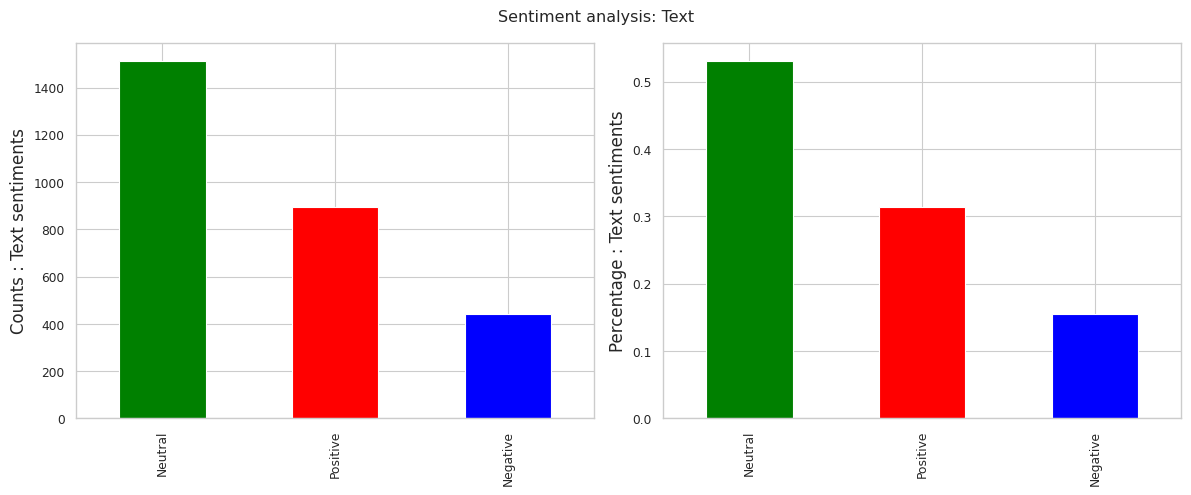

In [ ]:
df['text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

In [ ]:
tweets_agg_df = df.groupby(["date_only", "text_sentiment"])["Text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "text_sentiment", "count"]

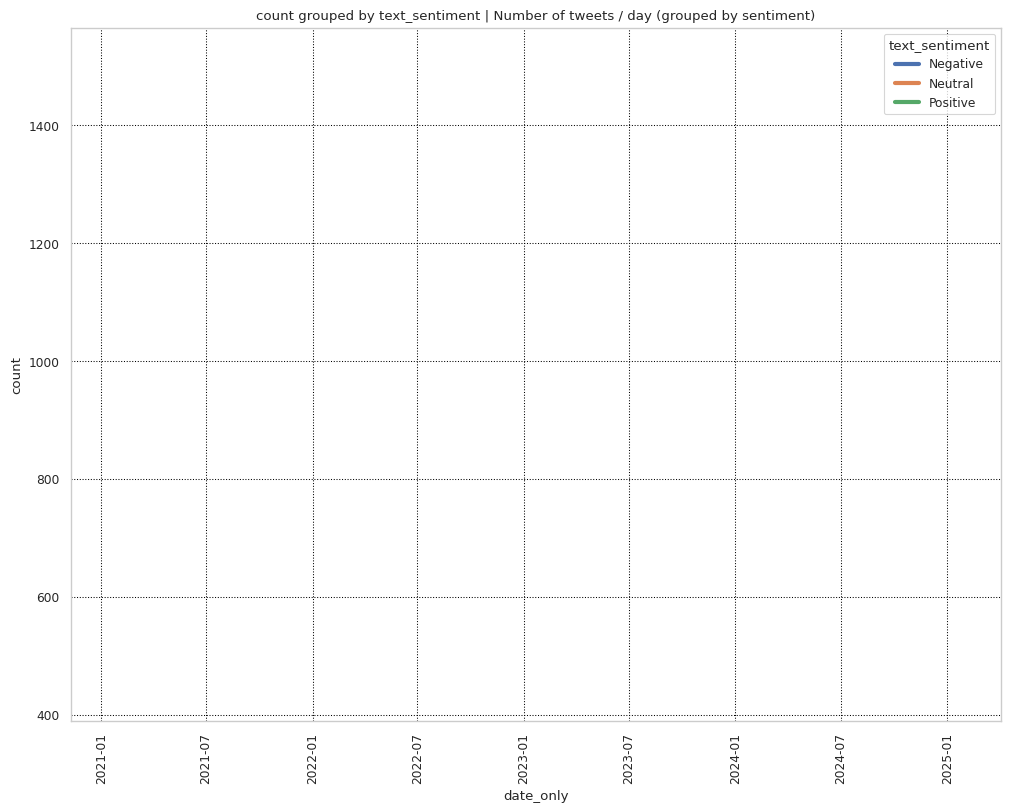

In [ ]:
plot_time_variation(tweets_agg_df, x='date_only', hue="text_sentiment", title="Number of tweets / day (grouped by sentiment)",size=3)

In [ ]:
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,hastag_counts,year,month,day,dayofweek,hour,minute,dayofyear,date_only,text_sentiment
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1.0,0.0,...,0.0,2023,1,22,6,13,44,22,2023-01-22,Neutral
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1.0,0.0,...,0.0,2023,1,22,6,13,44,22,2023-01-22,Positive
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0.0,0.0,...,1.0,2023,1,22,6,13,44,22,2023-01-22,Negative
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0.0,0.0,...,0.0,2023,1,22,6,13,44,22,2023-01-22,Neutral
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0.0,0.0,...,0.0,2023,1,22,6,13,44,22,2023-01-22,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,2023-01-22 16:17:01+00:00,1617194634765008899,It's fun to watch ChatGPT get simple history q...,pardon_mi,https://twitter.com/pardon_mi/status/161719463...,https://twitter.com/pardon_mi,NaN,NaN,3.0,13.0,...,0.0,2023,1,22,6,16,17,22,2023-01-22,Negative
2845,2023-01-22 16:17:07+00:00,1617194660304125954,@bennibaehr Je nachdem wie häufig ich davon ab...,xSakros,https://twitter.com/xSakros/status/16171946603...,https://twitter.com/xSakros,NaN,NaN,0.0,0.0,...,0.0,2023,1,22,6,16,17,22,2023-01-22,Negative
2846,2023-01-22 16:17:07+00:00,1617194658836393985,ChatGPTの有料プランを検討しようとアクセスしたら，ChatGPT is at capa...,igakunomichi,https://twitter.com/igakunomichi/status/161719...,https://twitter.com/igakunomichi,NaN,NaN,0.0,0.0,...,0.0,2023,1,22,6,16,17,22,2023-01-22,Neutral
2847,2023-01-22 16:17:15+00:00,1617194694542528513,@y2m4k7 CHATGPTっていうツール 文章系ならなんでもプログラミングもHTMLもス...,sakuraba_yuri,https://twitter.com/sakuraba_yuri/status/16171...,https://twitter.com/sakuraba_yuri,NaN,NaN,1.0,0.0,...,0.0,2023,1,22,6,16,17,22,2023-01-22,Neutral


In [ ]:
df.describe()

,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts,year,month,day,dayofweek,hour,minute,dayofyear
count,2.849000e+03,2848.000000,2848.000000,2848.000000,2848.000000,2.848000e+03,2848.000000,2849.0,2849.0,2849.0,2849.0,2849.000000,2849.000000,2849.0
mean,1.617176e+18,2.600772,3.955056,33.018258,0.853581,1.616440e+18,0.724368,2023.0,1.0,22.0,6.0,14.537031,28.809758,22.0
std,1.100449e+13,64.439850,130.116343,1073.430748,36.557426,1.913481e+16,1.755180,0.0,0.0,0.0,0.0,0.810384,18.599309,0.0
min,1.617156e+18,0.000000,0.000000,0.000000,0.000000,7.115537e+17,0.000000,2023.0,1.0,22.0,6.0,13.000000,0.000000,22.0
25%,1.617166e+18,0.000000,0.000000,0.000000,0.000000,1.617159e+18,0.000000,2023.0,1.0,22.0,6.0,14.000000,12.000000,22.0
50%,1.617175e+18,0.000000,0.000000,0.000000,0.000000,1.617170e+18,0.000000,2023.0,1.0,22.0,6.0,15.000000,29.000000,22.0
75%,1.617185e+18,1.000000,0.000000,2.000000,0.000000,1.617182e+18,1.000000,2023.0,1.0,22.0,6.0,15.000000,46.000000,22.0
max,1.617195e+18,3098.000000,6815.000000,56073.000000,1947.000000,1.617195e+18,23.000000,2023.0,1.0,22.0,6.0,16.000000,59.000000,22.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
df[['ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'hastag_counts']] = scaler.fit_transform(df[['ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'hastag_counts']])

# Tokenize the text using Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

# Pad sequences to ensure equal length
max_length = 50  # Adjust this based on the desired sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_length)

label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['text_sentiment'])


In [ ]:
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,year,month,day,dayofweek,hour,minute,dayofyear,date_only,text_sentiment,Sentiment
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,0.000323,0.000000,...,2023,1,22,6,13,44,22,2023-01-22,Neutral,1
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,0.000323,0.000000,...,2023,1,22,6,13,44,22,2023-01-22,Positive,2
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0.000000,0.000000,...,2023,1,22,6,13,44,22,2023-01-22,Negative,0
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0.000000,0.000000,...,2023,1,22,6,13,44,22,2023-01-22,Neutral,1
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0.000000,0.000000,...,2023,1,22,6,13,44,22,2023-01-22,Neutral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,2023-01-22 16:17:01+00:00,1617194634765008899,It's fun to watch ChatGPT get simple history q...,pardon_mi,https://twitter.com/pardon_mi/status/161719463...,https://twitter.com/pardon_mi,NaN,NaN,0.000968,0.001908,...,2023,1,22,6,16,17,22,2023-01-22,Negative,0
2845,2023-01-22 16:17:07+00:00,1617194660304125954,@bennibaehr Je nachdem wie häufig ich davon ab...,xSakros,https://twitter.com/xSakros/status/16171946603...,https://twitter.com/xSakros,NaN,NaN,0.000000,0.000000,...,2023,1,22,6,16,17,22,2023-01-22,Negative,0
2846,2023-01-22 16:17:07+00:00,1617194658836393985,ChatGPTの有料プランを検討しようとアクセスしたら，ChatGPT is at capa...,igakunomichi,https://twitter.com/igakunomichi/status/161719...,https://twitter.com/igakunomichi,NaN,NaN,0.000000,0.000000,...,2023,1,22,6,16,17,22,2023-01-22,Neutral,1
2847,2023-01-22 16:17:15+00:00,1617194694542528513,@y2m4k7 CHATGPTっていうツール 文章系ならなんでもプログラミングもHTMLもス...,sakuraba_yuri,https://twitter.com/sakuraba_yuri/status/16171...,https://twitter.com/sakuraba_yuri,NaN,NaN,0.000323,0.000000,...,2023,1,22,6,16,17,22,2023-01-22,Neutral,1


### LSTM

In [ ]:
from sklearn.model_selection import train_test_split

X = padded_sequences
y = df['Sentiment']  # Assuming 'Sentiment' is the column with sentiment labels (e.g., 0 for negative, 1 for positive)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

vocab_size = 10000  # Adjust this based on the number of unique words in your dataset
embedding_dim = 100
max_length = 50  # Adjust this based on the desired sequence length

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # Set to the index of your GPU device, or use "" for CPU


In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_val, y_val))

# You can adjust the number of epochs, batch size, etc.
# Now let's move on to Step 5 to evaluate the model


Epoch 1/500
36/36 [==============================] - 28s 325ms/step - loss: -837.9644 - accuracy: 0.6788 - val_loss: -611.1465 - val_accuracy: 0.5684
Epoch 2/500
36/36 [==============================] - 11s 299ms/step - loss: -841.1599 - accuracy: 0.6819 - val_loss: -623.3989 - val_accuracy: 0.5614
Epoch 3/500
36/36 [==============================] - 9s 260ms/step - loss: -844.1960 - accuracy: 0.6832 - val_loss: -618.9592 - val_accuracy: 0.5684
Epoch 4/500
36/36 [==============================] - 11s 298ms/step - loss: -846.4936 - accuracy: 0.6823 - val_loss: -621.7053 - val_accuracy: 0.5719
Epoch 5/500
36/36 [==============================] - 11s 306ms/step - loss: -849.9554 - accuracy: 0.6841 - val_loss: -632.1940 - val_accuracy: 0.5719
Epoch 6/500
36/36 [==============================] - 11s 310ms/step - loss: -851.4621 - accuracy: 0.6836 - val_loss: -616.4065 - val_accuracy: 0.5684
Epoch 7/500
36/36 [==============================] - 11s 309ms/step - loss: -854.4240 - accuracy: 0.6

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


9/9 [==============================] - 1s 58ms/step - loss: -1180.4863 - accuracy: 0.5579
Test loss: -1180.486328125, Test accuracy: 0.557894766330719


### BiLSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# Assuming you have already preprocessed your data and created X_train, y_train, X_val, y_val, X_test, y_test

# Build the BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_val, y_val))




Epoch 1/500
36/36 [==============================] - 17s 335ms/step - loss: -1.7714 - accuracy: 0.5261 - val_loss: -4.7668 - val_accuracy: 0.5404
Epoch 2/500
36/36 [==============================] - 11s 299ms/step - loss: -4.6055 - accuracy: 0.5309 - val_loss: -6.9205 - val_accuracy: 0.5404
Epoch 3/500
36/36 [==============================] - 10s 276ms/step - loss: -6.1641 - accuracy: 0.5309 - val_loss: -8.7155 - val_accuracy: 0.5404
Epoch 4/500
36/36 [==============================] - 11s 290ms/step - loss: -7.5451 - accuracy: 0.5309 - val_loss: -10.4672 - val_accuracy: 0.5404
Epoch 5/500
36/36 [==============================] - 11s 315ms/step - loss: -8.8819 - accuracy: 0.5309 - val_loss: -12.1482 - val_accuracy: 0.5404
Epoch 6/500
36/36 [==============================] - 11s 310ms/step - loss: -10.1953 - accuracy: 0.5309 - val_loss: -13.8385 - val_accuracy: 0.5404
Epoch 7/500
36/36 [==============================] - 11s 307ms/step - loss: -11.5172 - accuracy: 0.5309 - val_loss: -15.

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

9/9 [==============================] - 0s 49ms/step - loss: -822.6729 - accuracy: 0.5439
Test loss: -822.6729125976562, Test accuracy: 0.5438596606254578
